<h1> Heart Failure Prediction</h1>

Real Medical World Problem Statement:-

Cardiovascular Diseases(CVDs) are the number one cause of death globally, taking an estimated 17.9 million lives each year. This accounts for 31% of all death worldwide.Heart failure is a coomon occurence caused by CVDs and this dataset contains 12 featres that can be used to predict mortality by heart failure.

Creating a machine model will helpin early detection which can save lives.

Some Features considered in predicting a person's death include:
    Age, Gender, Blood pressure, Diabetes, Smoker, Ejection fraction, Creatine phosphokinase, Serum creatinine, Serum sodium, time

Database link: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

Ref: Ayush Singh



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [5]:
data = pd.read_csv('dataset/archive/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
print('Shape of the data', data.shape)

Shape of the data (299, 13)


In [7]:
print('Information about data: ' )
data.info()

Information about data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 3

In [8]:
print('Describe the data: ')
data.describe()

Describe the data: 


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
print(f'Number of Null Values: ')
data.isnull().sum()

Number of Null Values: 


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
print(f'Number of Null Values: ')
data.isnull().sum().sum()

Number of Null Values: 


0

<h1> Exploratory Data Analysis </h1>
<p> Exploratory Data Analysis is the critical process of performing initial investigations on data to discover patterns, spot anomalies, test hypothesis and check for assumptions with the help of summary statistics and graphical representations.</p>

Total Number of Living Cases:  203
Total Number of Dead Cases:  96


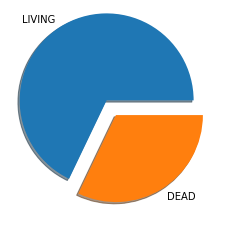

In [13]:
# Setting the distribution in classes to help identify the types
len_live = len(data['DEATH_EVENT'][data.DEATH_EVENT == 0])
len_death = len(data['DEATH_EVENT'][data.DEATH_EVENT == 1])

arr = np.array([len_live, len_death])
labels = ['LIVING', 'DEAD']
print('Total Number of Living Cases: ', len_live)
print('Total Number of Dead Cases: ', len_death)

plt.pie(arr, labels = labels, explode = [0.2, 0.0], shadow = True)
plt.show()

#inference: working on imbalance data
# imbalance data means the data in the classes are not equally distributed

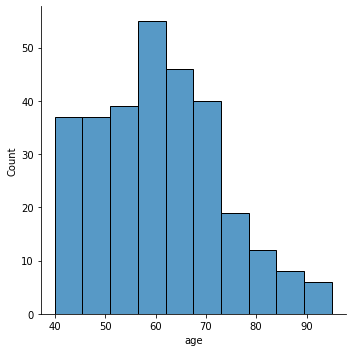

In [14]:
#viewing the distribution of age
sns.displot(data['age'])
plt.show()

Total Number of Living Cases:  167
Total Number of Dead Cases:  85


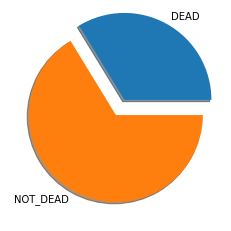

In [16]:
#selecting columns that are above age 50 and viewing if dead or not
age_above_50_not_dead  = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 0]
age_above_50_dead  = data['DEATH_EVENT'][data.age >= 50][data.DEATH_EVENT == 1]

len_dead = len(age_above_50_dead)
len_not_dead = len(age_above_50_not_dead)

arr1 = [len_dead, len_not_dead]
labels = ['DEAD', 'NOT_DEAD']
print('Total Number of Living Cases: ', len_not_dead)
print('Total Number of Dead Cases: ', len_dead)
plt.pie(arr1, labels = labels, explode = [0.2,0.0], shadow = True)

plt.show()

#Inference in most of the cases of people aged above 50 that is not dead if copared to the above accordingly
#plot to view that the number of people above 50 that is dead is comparatively higher

Total Number of Living Cases:  85
Total Number of Dead Cases:  40


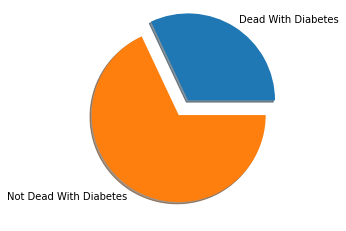

In [17]:
#selecting columns that are above age 50 and viewing if dead or not
patient_without_diabetes  = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 0]
patient_with_diabetes  = data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1]

len_d_dead = len(patient_with_diabetes)
len_d_alive = len(patient_without_diabetes)

arr2 = [len_d_dead, len_d_alive]
labels = ['Dead With Diabetes', 'Not Dead With Diabetes']
print('Total Number of Living Cases: ', len_d_alive)
print('Total Number of Dead Cases: ', len_d_dead)
plt.pie(arr2, labels = labels, explode = [0.2,0.0], shadow = True)

plt.show()

#inference: This shows that most peole with diabetes are alive

Total Number of Living Cases:  71
Total Number of Dead Cases:  62


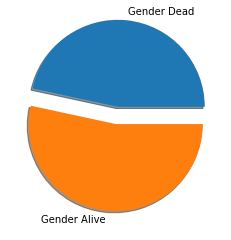

In [31]:
#selecting columns that are sex
patient_sex_alive  = data['DEATH_EVENT'][data.sex == 0][data.DEATH_EVENT == 0]
patient_sex_dead  = data['DEATH_EVENT'][data.sex == 1][data.DEATH_EVENT == 1]

len_s_dead = len(patient_sex_dead)
len_s_alive = len(patient_sex_alive)

arr3 = [len_s_dead, len_s_alive]
labels = ['Gender Dead', 'Gender Alive']
print('Total Number of Living Cases: ', len_s_alive)
print('Total Number of Dead Cases: ', len_s_dead)
plt.pie(arr3, labels = labels, explode = [0.2,0.0], shadow = True)

plt.show()

#inference: This shows that most peole of this gender are dead

Total Number of Living Cases:  137
Total Number of Dead Cases:  39


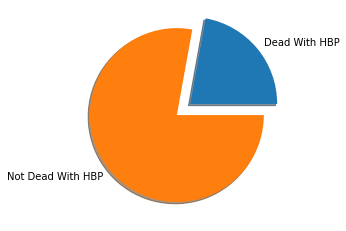

In [32]:
#selecting columns of high blood pressure
patient_without_hbp  = data['DEATH_EVENT'][data.high_blood_pressure == 0][data.DEATH_EVENT == 0]
patient_with_hbp  = data['DEATH_EVENT'][data.high_blood_pressure == 1][data.DEATH_EVENT == 1]

len_hbp_dead = len(patient_with_hbp)
len_hbp_alive = len(patient_without_hbp)

arr4 = [len_hbp_dead, len_hbp_alive]
labels = ['Dead With HBP', 'Not Dead With HBP']
print('Total Number of Living Cases: ', len_hbp_alive)
print('Total Number of Dead Cases: ', len_hbp_dead)
plt.pie(arr4, labels = labels, explode = [0.2,0.0], shadow = True)

plt.show()

#inference: This shows that most peole with high blood pressure are alive

Total Number of Living Cases:  0
Total Number of Dead Cases:  0


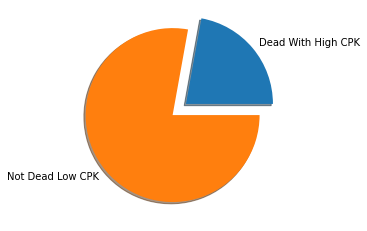

In [33]:
#selecting columns of high blood pressure
patient_without_cpk  = data['DEATH_EVENT'][data.creatinine_phosphokinase == 0][data.DEATH_EVENT == 0]
patient_with_cpk  = data['DEATH_EVENT'][data.creatinine_phosphokinase == 1][data.DEATH_EVENT == 1]

len_cpk_dead = len(patient_with_cpk)
len_cpk_alive = len(patient_without_cpk)

arr5 = [len_hbp_dead, len_hbp_alive]
labels = ['Dead With High CPK', 'Not Dead Low CPK']
print('Total Number of Living Cases: ', len_cpk_alive)
print('Total Number of Dead Cases: ', len_cpk_dead)
plt.pie(arr5, labels = labels, explode = [0.2,0.0], shadow = True)

plt.show()

#inference: This shows that all peole with high and low/normal CPK are alive

'\n\n-Earth square shows the correlation between the variables on each axis. Correlation ranges from +1 to -1.Values closer to zero means there is no linear trend between the two variables(which means you cannot perform linear regression here)\n-The close to 1 the correlation is, the more positively correlated they are: i.e as one increases, so does the other and the closer to 1 the stronger the relationship is\n-A correlation closer to -1 is similar but instead of both increasing, one variable will decrease as the other increases\n\n'

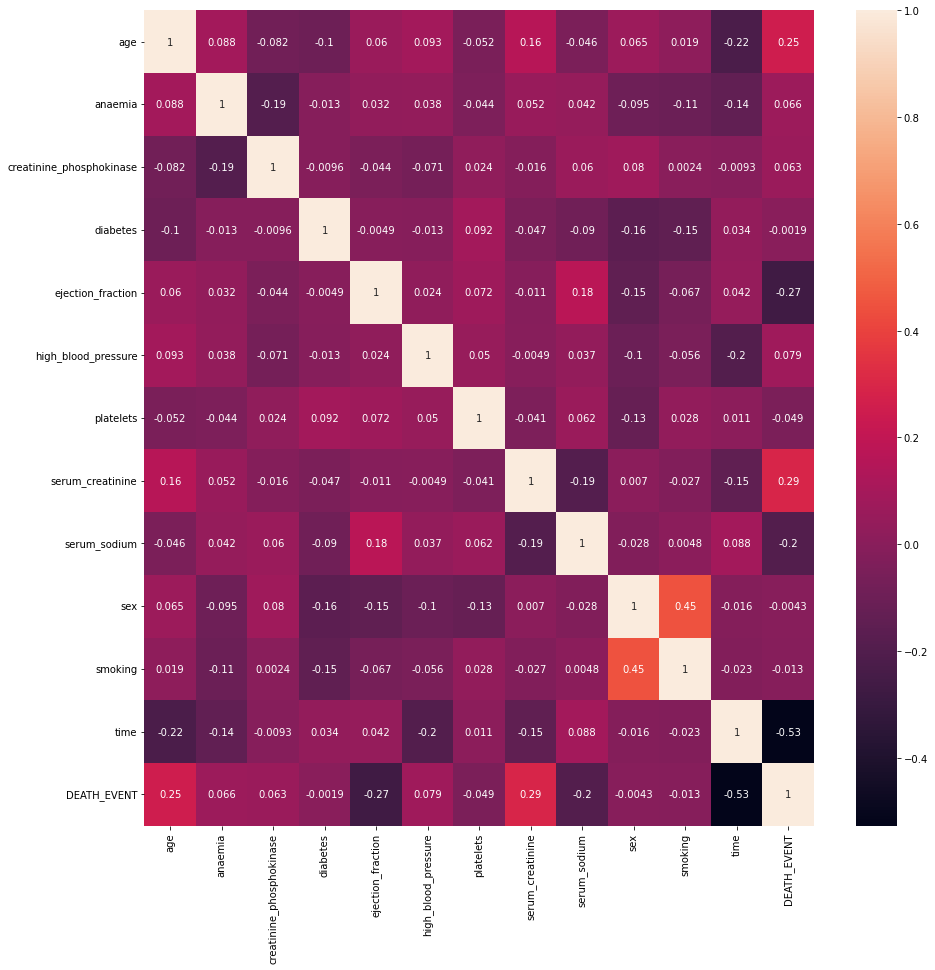

In [19]:
#checking the Correlation of our variables
corr = data.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)

#interpretation of correlation matrix
'''

-Earth square shows the correlation between the variables on each axis. Correlation ranges from +1 to -1.Values closer to zero means there is no linear trend between the two variables(which means you cannot perform linear regression here)
-The close to 1 the correlation is, the more positively correlated they are: i.e as one increases, so does the other and the closer to 1 the stronger the relationship is
-A correlation closer to -1 is similar but instead of both increasing, one variable will decrease as the other increases

'''

#ref: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [21]:
#same process here
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<h1> Dataset Development </h1>

In [22]:
from sklearn.model_selection import train_test_split

x = data.drop('DEATH_EVENT', axis =1)
y = data['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state= 0)
print('Shape of the x_train', x_train.shape)
print('Shape of the y_train', y_train.shape)
print('Shape of the x_test', x_test.shape)
print('Shape of the y_test', y_test.shape)

Shape of the x_train (209, 12)
Shape of the y_train (209,)
Shape of the x_test (90, 12)
Shape of the y_test (90,)


<h1>Feature Engineering</h1>
<p> Adding interaction terms. Interaction terms are the product of two features. Below is the function prepared for interaction terms</p>

In [29]:
def add_interactions(x):
    features = x.columns
    m = len(features)
    x_int = x.copy(deep=True)
    
    for i in range(m):
        
        feature_i_name = features[i]
        
        feature_i_data = x[feature_i_name]
        
        for j in range (i+1, m):
            
            feature_j_name = features[j]
            feature_j_data = x[feature_j_name]
            feature_i_j_name = feature_i_name+ '_x_'+ feature_j_name
            x_int[feature_i_j_name] =feature_i_data * feature_j_data
    
    
    return x_int

x_train_mod = add_interactions(x_train)
x_test_mod = add_interactions(x_test)


In [30]:
x_train_mod

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,serum_creatinine_x_serum_sodium,serum_creatinine_x_sex,serum_creatinine_x_smoking,serum_creatinine_x_time,serum_sodium_x_sex,serum_sodium_x_smoking,serum_sodium_x_time,sex_x_smoking,sex_x_time,smoking_x_time
281,70.0,0,582,0,40,0,51000.0,2.7,136,1,...,367.2,2.7,2.7,675.0,136,136,34000,1,250,250
44,60.0,1,588,1,60,0,194000.0,1.1,142,0,...,156.2,0.0,0.0,36.3,0,0,4686,0,0,0
241,65.0,0,582,1,30,0,249000.0,1.3,136,1,...,176.8,1.3,1.3,275.6,136,136,28832,1,212,212
189,40.0,0,244,0,45,1,275000.0,0.9,140,0,...,126.0,0.0,0.0,156.6,0,0,24360,0,0,0
152,50.0,0,115,0,45,1,184000.0,0.9,134,1,...,120.6,0.9,0.9,106.2,134,134,15812,1,118,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,55.0,0,572,1,35,0,231000.0,0.8,143,0,...,114.4,0.0,0.0,172.0,0,0,30745,0,0,0
192,50.0,1,121,1,40,0,260000.0,0.7,130,1,...,91.0,0.7,0.0,122.5,130,0,22750,0,175,0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,...,441.6,0.0,0.0,300.8,0,0,12972,0,0,0
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,...,82.8,0.6,0.6,24.0,138,138,5520,1,40,40


<h1> Model Building </h1>

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def evaluating_model(y_test, y_pred):
    '''
    Function to evaluate the models
    
    '''
    print('Accuracy Score: ', accuracy_score(y_test,y_pred))
    print('Precision Score: ', precision_score(y_test,y_pred))
    print('Recall Score: ', recall_score(y_test,y_pred))
    print('Confusion Matrix : \n', confusion_matrix(y_test,y_pred))

In [40]:
#building logistic regression model as a baseline model

from sklearn.linear_model import LogisticRegression

lr_clf =LogisticRegression(max_iter=1000)
lr_clf.fit(x_train, y_train)

lr_clf_pred = lr_clf.predict(x_test)

In [41]:
y_pred = lr_clf.predict(x_test)
evaluating_model(y_test,y_pred)

Accuracy Score:  0.7888888888888889
Precision Score:  0.7647058823529411
Recall Score:  0.4642857142857143
Confusion Matrix : 
 [[58  4]
 [15 13]]


In [44]:
#building logistic regression with StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr_clf_pip =make_pipeline(StandardScaler(), LogisticRegression())
lr_clf_pip.fit(x_train, y_train)

y_pred1= lr_clf_pip.predict(x_test)
evaluating_model(y_test,y_pred1)

Accuracy Score:  0.8111111111111111
Precision Score:  0.7894736842105263
Recall Score:  0.5357142857142857
Confusion Matrix : 
 [[58  4]
 [13 15]]


In [46]:
#building a support vector classifer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C':[0.1, 1, 10, 100, 1000],
             'gamma':[1, 0.1, 0.01, 0.0001],
             'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose= 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.0001], 'kernel': ['rbf']},
             verbose=3)

In [47]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [48]:
svc =SVC (C = 10, gamma = 0.0001)
svc.fit(x_train,y_train)
y_pred2 = svc.predict(x_test)
evaluating_model(y_test, y_pred2)

Accuracy Score:  0.6777777777777778
Precision Score:  0.4
Recall Score:  0.07142857142857142
Confusion Matrix : 
 [[59  3]
 [26  2]]


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)):
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv = 5, n_jobs = -1, random_state =2)
    rand_clf.fit(x_train, y_train)
    best_model = rand_clf.best_estimator_
    best_score= rand_clf.best_score_
    
    print('Training Score: {:.3f}'.format(best_score))
    y_pred =best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test Score: {:.3f}'.format(accuracy))
    
    return best_model

randomized_search(params ={
    'criterion': ['entropy','gini'],
    'splitter':['random', 'best'],
    'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
    'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
    'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
    'min_impurity_decrease': [0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
    'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
    'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
    'max_depth':[None, 2, 4, 6, 8],
    'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
})

Training Score: 0.847
Test Score: 0.756


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [59]:
ds_clf =DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

ds_clf.fit(x_train,y_train)
pred4 = ds_clf.predict(x_test)
evaluating_model(y_test, pred4)

Accuracy Score:  0.7555555555555555
Precision Score:  0.625
Recall Score:  0.5357142857142857
Confusion Matrix : 
 [[53  9]
 [13 15]]


In [58]:
ds_clf =DecisionTreeClassifier(max_depth = 8, max_features = 0.9, max_leaf_nodes = 30, min_impurity_decrease =0.05,
                              min_samples_leaf = 0.02, min_samples_split = 10, min_weight_fraction_leaf = 0.005, 
                              random_state = 2, splitter ='random')

ds_clf.fit(x_train,y_train)
pred4 = ds_clf.predict(x_test)
evaluating_model(y_test, pred4)

Accuracy Score:  0.8111111111111111
Precision Score:  0.72
Recall Score:  0.6428571428571429
Confusion Matrix : 
 [[55  7]
 [10 18]]


In [61]:
from sklearn.ensemble import RandomForestClassifier

randomized_search(params ={'min_samples_leaf':[1, 2, 4, 6, 8, 10, 20, 30],
                           'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                           'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                           'max_depth':[None, 2, 4, 6, 8, 10, 20],
                           }, clf = RandomForestClassifier(random_state = 2))

Training Score: 0.847
Test Score: 0.867


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [62]:
rf_clf = RandomForestClassifier(max_depth = 2, max_features = 0.5, min_impurity_decrease =0.01,
                              min_samples_leaf = 10, 
                              random_state = 2)

rf_clf.fit(x_train,y_train)
pred5 = rf_clf.predict(x_test)
evaluating_model(y_test, pred5)

Accuracy Score:  0.8666666666666667
Precision Score:  0.9
Recall Score:  0.6428571428571429
Confusion Matrix : 
 [[60  2]
 [10 18]]


In [65]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(colsample_bytree = 1.0,
                    learning_rate = 0.1,
                    max_depth =4,
                    n_estimators = 400,
                    subsample = 1.0)

eval_set = [(x_test, y_test)]
xgb1.fit(x_train, y_train, early_stopping_rounds =10, eval_metric ='logloss', eval_set = eval_set, verbose = True)

[0]	validation_0-logloss:0.63929
[1]	validation_0-logloss:0.59762
[2]	validation_0-logloss:0.56422
[3]	validation_0-logloss:0.53184
[4]	validation_0-logloss:0.50465
[5]	validation_0-logloss:0.48130
[6]	validation_0-logloss:0.46135
[7]	validation_0-logloss:0.44722
[8]	validation_0-logloss:0.43508
[9]	validation_0-logloss:0.42311
[10]	validation_0-logloss:0.40869
[11]	validation_0-logloss:0.39828
[12]	validation_0-logloss:0.39094
[13]	validation_0-logloss:0.38523
[14]	validation_0-logloss:0.37836
[15]	validation_0-logloss:0.37250
[16]	validation_0-logloss:0.36963
[17]	validation_0-logloss:0.36676


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-logloss:0.36467
[19]	validation_0-logloss:0.36335
[20]	validation_0-logloss:0.36152
[21]	validation_0-logloss:0.36137
[22]	validation_0-logloss:0.35676
[23]	validation_0-logloss:0.35485
[24]	validation_0-logloss:0.35313
[25]	validation_0-logloss:0.34993
[26]	validation_0-logloss:0.34873
[27]	validation_0-logloss:0.34697
[28]	validation_0-logloss:0.34448
[29]	validation_0-logloss:0.34190
[30]	validation_0-logloss:0.34213
[31]	validation_0-logloss:0.34117
[32]	validation_0-logloss:0.33854
[33]	validation_0-logloss:0.33701
[34]	validation_0-logloss:0.33778
[35]	validation_0-logloss:0.33757
[36]	validation_0-logloss:0.33578
[37]	validation_0-logloss:0.33511
[38]	validation_0-logloss:0.33418
[39]	validation_0-logloss:0.33277
[40]	validation_0-logloss:0.33211
[41]	validation_0-logloss:0.32965
[42]	validation_0-logloss:0.32868
[43]	validation_0-logloss:0.32739
[44]	validation_0-logloss:0.32850
[45]	validation_0-logloss:0.32888
[46]	validation_0-logloss:0.33055
[47]	validatio

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
pred6 = xgb1.predict(x_test)
evaluating_model(y_test, pred6)

Accuracy Score:  0.8555555555555555
Precision Score:  0.8
Recall Score:  0.7142857142857143
Confusion Matrix : 
 [[57  5]
 [ 8 20]]


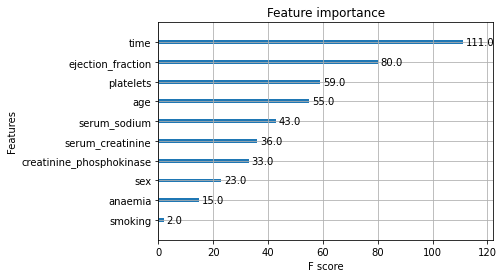

In [67]:
from xgboost import plot_importance
#xgb.features_importances_
plot_importance(xgb1)
plt.show()

In [69]:
from sklearn.ensemble import GradientBoostingClassifier

gdbt = GradientBoostingClassifier(n_estimators = 200,learning_rate = 0.1, max_depth = 1, random_state = 0)
gdbt.fit(x_train, y_train)

pred_gdbt = gdbt.predict(x_test)
evaluating_model(y_test, pred_gdbt)

Accuracy Score:  0.8555555555555555
Precision Score:  0.8571428571428571
Recall Score:  0.6428571428571429
Confusion Matrix : 
 [[59  3]
 [10 18]]


<h1> Choosing the best model and saving them</h1>

In [70]:
#Using XGboost as it is more robust

import joblib
joblib.dump(xgb1, 'model.pkl')
model = joblib.load('model.pkl')
model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])